### Lista de Imports

In [1]:
pip install colour

Note: you may need to restart the kernel to use updated packages.


In [2]:
import sklearn
import pandas as pd
from colour import Color
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
import numpy as np
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

### Machine Learning
### Punto 1

a) Se agrupan los datos en un set de entrenamiento (80%) y un set de prueba (20%)

In [3]:
# Data imported and located
data1 = pd.read_csv('winequality-red.csv', delimiter = ';')
data2 = pd.read_csv('winequality-white.csv', delimiter = ';')
data = data1.append(data2)

# Data for the split
x1 = data1.iloc[:, 0:12]
x2 = data1.iloc[:, -1]

# Split function: Data segmentation
x_train, x_test, y_train, y_test = train_test_split(x1, x2, test_size = 0.2, random_state = 42)
dataP = {"Data for training - x1": [x_train.shape],
       "Data Test - x1": [x_test.shape],
        "Data for training - x2": [y_train.shape],
        "Data Test - x2": [y_test.shape]}

# Data vizualitaion 
df = pd.DataFrame(dataP)
df.head()

,Data for training - x1,Data Test - x1,Data for training - x2,Data Test - x2
0,"(1279, 12)","(320, 12)","(1279,)","(320,)"


b) Se esogen dos columnas correspondientes a features de la base de datos importado. Para esto último, se realiza un scatterplot de estas dos columnas en el plano xy.

In [4]:
# Code imported form de lab
red = Color('red')
colors = list(red.range_to(Color('green'),7))
colors = [str(c) for c in colors]
muestra = np.array(x2) - 3

c_quality = []
for i in muestra:
    c_quality.append(colors[i])
    
# Relations of interest
rel = np.array([['total sulfur dioxide','pH'], 
               ['residual sugar', 'chlorides'],
               ['citric acid', 'volatile acidity'],
               ['fixed acidity','free sulfur dioxide']])

c) en base a los anterior, se grafica los 4 casos de análisis haciendo uso de las funciones previamente definidadad y las restricciones dadas por el enunciado.

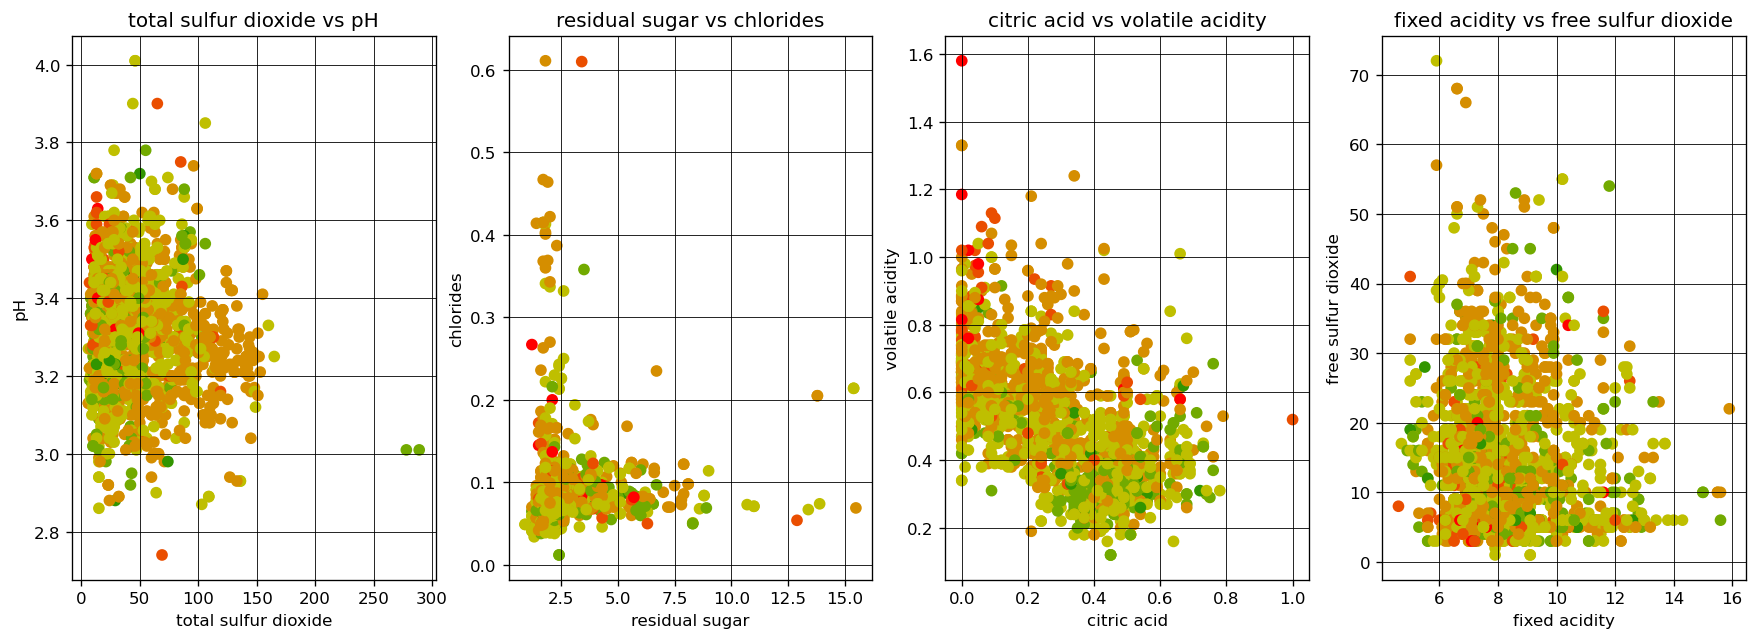

In [5]:
# Scatter plot
for i in range(len(rel)):
    figure(1, figsize=(18, 6), dpi=120)
    plt.subplot(1,4,i+1)
    plt.scatter(data[rel[i][0]][0:1599], data[rel[i][1]][0:1599], c = c_quality)
    
    # Marcos de refrencia
    plt.xlabel(rel[i][0])
    plt.ylabel(rel[i][1])
    plt.title(rel[i][0] +' vs '+rel[i][1])
    plt.grid(color= 'black', linestyle='-', linewidth=0.5)

plt.show()


### Punto 2

Se construye una red neuronal con la clase MLPRegressor de sklearn.neural network, con las siguientes características:
<br>

- Una única capa de 10 neuronas
- Función de activación: tagente hiperbólica
- Máximo de iteraciones: 1000

In [6]:
# The paremeter used as x2 was the quality of the wine
x2 = np.array(data['quality'])

# First neuron: Lbfgs
Neu_L = MLPRegressor(hidden_layer_sizes=(1,10), activation = 'tanh', max_iter=1000, solver = 'lbfgs') 

# Second neuron: Sgd
Neu_S = MLPRegressor(hidden_layer_sizes=(1,10), activation = 'tanh', max_iter=1000, solver = 'sgd')

# Third neuron: Adam
Neu_A = MLPRegressor(hidden_layer_sizes=(1,10), activation = 'tanh', max_iter=1000, solver = 'adam')


# Training
Neu_L.fit(data, x2)
Neu_S.fit(data, x2)
Neu_A.fit(data, x2)
 

MLPRegressor(activation='tanh', hidden_layer_sizes=(1, 10), max_iter=1000)

### Punto 3

Teniendo en cuenta el procedimiento anterior, se valua el desempeño de cada método a traves del uso de curve-loss, metricas de la librería y Cross validation score 5 fold, tal y como se muestra a continuación:

In [13]:
print('Caso de análisis para el método LBGS: No existe Curve-Loss para LBGS')

# Metrics for the analysis
print('Metrics for the SGD')

pre_L = Neu_L.predict(x_test)

# Score
print('Score: ' + str(round(Neu_L.score(x_test, y_test), 3)))

# Mean square error
print('Mean squared error: ' + str(round(mean_squared_error(y_test, pre_L), 3)))

# Cross validation score 5-fold
print('Cross validation score 5-fold: ' +str(cross_val_score(Neu_L, x1, x2[0:1599], cv = 5)))




Caso de análisis para el método LBGS: No existe Curve-Loss para LBGS
Metrics for the SGD
Score: -0.028
Mean squared error: 0.671
Cross validation score 5-fold: [-0.13559224 -0.04345667 -0.01133713 -0.16393516 -0.04012673]


Caso de análisis para el método SGD:


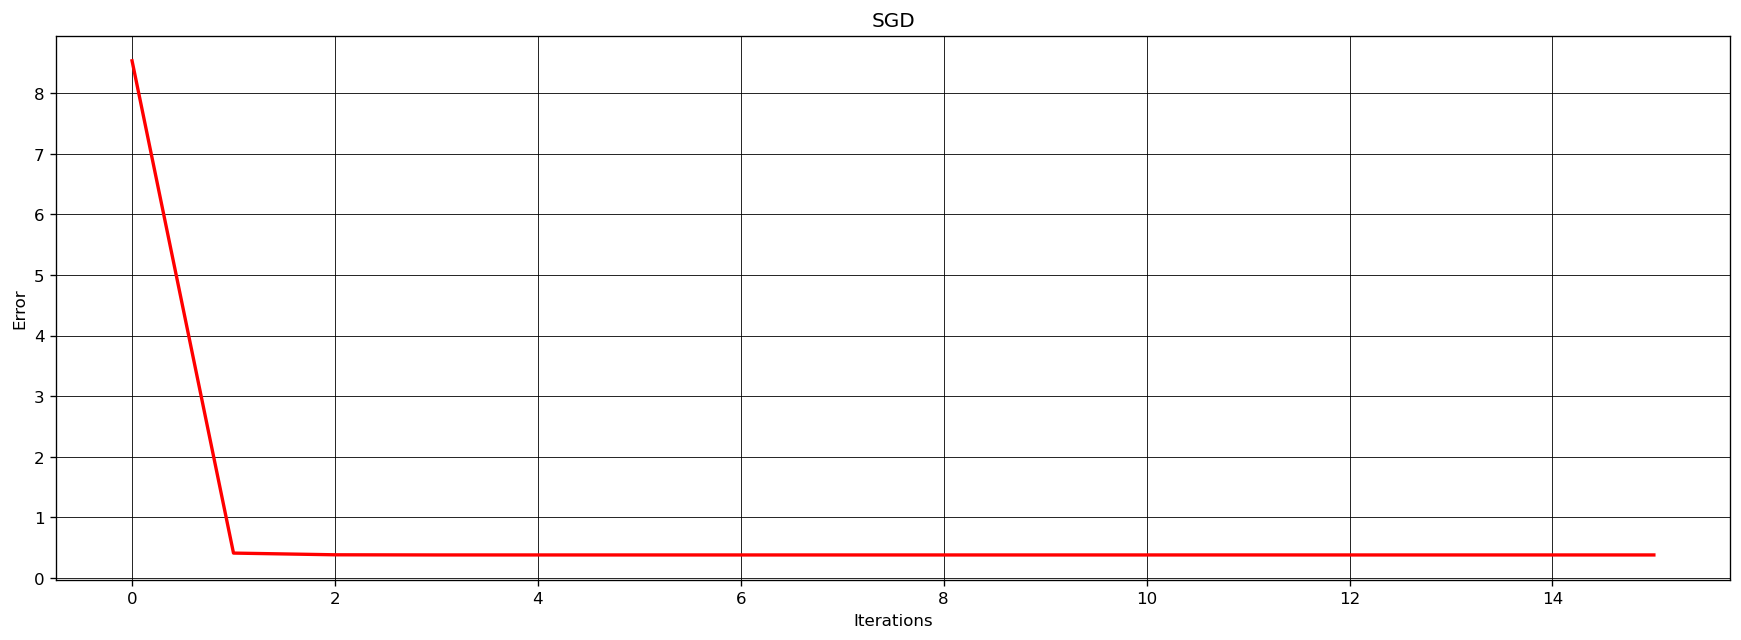

In [11]:
print('Caso de análisis para el método SGD:')

#Obtener funcion de perdidas
G_NeuS = Neu_S.loss_curve_ 

figure(2, figsize=(18, 6), dpi=120)
plt.plot(G_NeuS, linewidth = 2, color = 'red')
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title("SGD")
plt.grid(color= 'black', linestyle='-', linewidth=0.5)
plt.show()

In [8]:
# Metrics for the analysis
print('Metrics for the SGD')
pre_S = Neu_S.predict(x_test)

# Score
print('Score: ' + str(round(Neu_S.score(x_test, y_test), 3)))

# Mean square error
print('Mean squared error: ' + str(round(mean_squared_error(y_test, pre_S), 3)))

# Cross validation score 5-fold
print('Cross validation score 5-fold: ' +str(cross_val_score(Neu_S, x1, x2[0:1599], cv = 5)))



Metrics for the SGD
Score: -0.031
Mean squared error: 0.674
Cross validation score 5-fold: [-0.13302324 -0.0439935  -0.01263883 -0.16193746 -0.040086  ]


Caso de análisis para el método Adam:


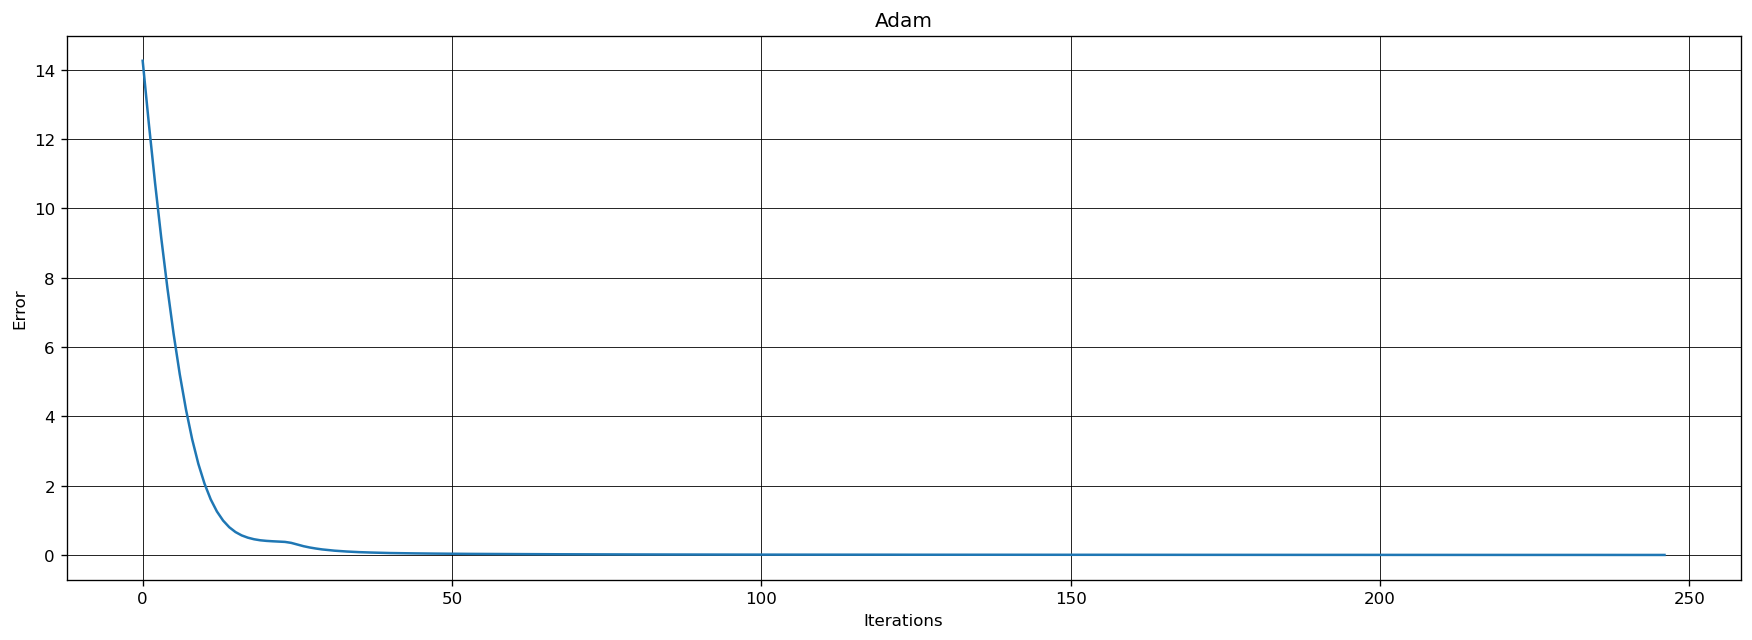

In [12]:
print('Caso de análisis para el método Adam:')

#Obtener funcion de perdidas
G_NeuA = Neu_A.loss_curve_

figure(2, figsize=(18, 6), dpi=120)
plt.plot(G_NeuA)
plt.xlabel('Iterations')
plt.ylabel('Error')
plt.title("Adam")
plt.grid(color= 'black', linestyle='-', linewidth=0.5)

In [10]:
# Metrics for the analysis
print('Metrics for the Adam method')
pre_A = Neu_A.predict(x_test)

# Score
print('Score: ' + str(round(Neu_A.score(x_test, y_test), 3)))

# Mean square error
print('Mean squared error: ' + str(round(mean_squared_error(y_test, pre_A), 3)))

# Cross validation score 5-fold
print('Cross validation score 5-fold: ' +str(cross_val_score(Neu_A, x1, x2[0:1599], cv = 5)))

Metrics for the Adam method
Score: 0.996
Mean squared error: 0.003
Cross validation score 5-fold: [-0.12073953 -0.05045479 -0.00782499 -0.17787958 -0.02228668]


### Conclusión

Para cada caso se amplió la gráfica para poder apreciar en mejor manera el comportamiento obtenido. De lo anterior se concluye que ambos métodos son eficientes para la tarea a desarrollar, sin embargo, el método que presenta un mejor desempeño para el modelo evaluado es el adam ya que logra converger el error a un valor muy cercano a 0. Posiblemente esto se debe a la dispersión y correlación de los datos usados.